## Image Classification


Image classification is one of the important use cases in our daily life. Automotive, e-commerce, retail, manufacturing industries, security, surveillance, healthcare, farming etc., can have a wide application of image classification.

**Objective:** In this notebook, we will build a neural network to classifiy the image based on the object present in the image.



## Advanced techniques for training neural networks

Weight Initialization

Nonlinearity (different Activation functions)

Optimizers(different optimizers)

Batch Normalization

Dropout

### About Dataset


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot 

### Load dataset

Fashion-MNIST dataset


In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


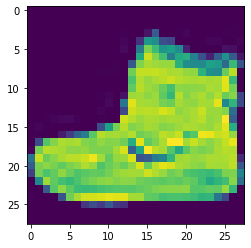

Label:  9


In [0]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])


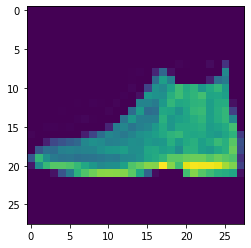

Label:  9


In [0]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

### Data Pre-processing

In [0]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [0]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


### Basic NN model

Naive MLP model without any alterations

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [0]:
model = Sequential()

In [0]:
  model.add(Dense(50, input_shape = (784, )))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

In [0]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 43us/sample - loss: 2.3593 - accuracy: 0.0940
Epoch 2/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2999 - accuracy: 0.1338
Epoch 3/100
60000/60000 [==============================] - 1s 20us/sample - loss: 2.2978 - accuracy: 0.1374
Epoch 4/100
60000/60000 [==============================] - 1s 20us/sample - loss: 2.2961 - accuracy: 0.1944
Epoch 5/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2943 - accuracy: 0.1829
Epoch 6/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2923 - accuracy: 0.2363
Epoch 7/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2901 - accuracy: 0.2369
Epoch 8/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2875 - accuracy: 0.2861
Epoch 9/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2842 - accuracy: 0.3152
Epoch

In [0]:
results = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7735


### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

Ref: https://keras.io/initializers/

In [0]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 25us/sample - loss: 2.4123 - accuracy: 0.1000
Epoch 2/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3463 - accuracy: 0.1000
Epoch 3/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3188 - accuracy: 0.0999
Epoch 4/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3057 - accuracy: 0.0973
Epoch 5/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2991 - accuracy: 0.0966
Epoch 6/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2955 - accuracy: 0.1173
Epoch 7/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2935 - accuracy: 0.1644
Epoch 8/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2921 - accuracy: 0.1898
Epoch 9/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2910 - accuracy: 0.2368
Epoch

In [0]:
results = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.484


### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

Ref: https://keras.io/activations/

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.9582 - accuracy: 0.7110
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5724 - accuracy: 0.7960
Epoch 3/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5160 - accuracy: 0.8145
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4805 - accuracy: 0.8272
Epoch 5/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4581 - accuracy: 0.8341
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4416 - accuracy: 0.8408
Epoch 7/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4262 - accuracy: 0.8449
Epoch 8/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4134 - accuracy: 0.8509
Epoch 9/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4047 - accuracy: 0.8525
Epoch

In [0]:
results = model.evaluate(X_test, y_test)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.844


### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://keras.io/optimizers/

In [0]:
from tensorflow.keras.layers import BatchNormalization, Dropout


Batch normalization layer is usually inserted after dense/convolution and before nonlinearity



In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 183us/sample - loss: 1.3713 - accuracy: 0.5831
Epoch 2/20
60000/60000 [==============================] - 10s 164us/sample - loss: 0.8637 - accuracy: 0.7496
Epoch 3/20
60000/60000 [==============================] - 10s 165us/sample - loss: 0.7127 - accuracy: 0.7828
Epoch 4/20
60000/60000 [==============================] - 10s 164us/sample - loss: 0.6411 - accuracy: 0.7968
Epoch 5/20
60000/60000 [==============================] - 10s 165us/sample - loss: 0.5898 - accuracy: 0.8099
Epoch 6/20
60000/60000 [==============================] - 10s 164us/sample - loss: 0.5584 - accuracy: 0.8159
Epoch 7/20
60000/60000 [==============================] - 10s 164us/sample - loss: 0.5352 - accuracy: 0.8217
Epoch 8/20
60000/60000 [==============================] - 10s 163us/sample - loss: 0.5142 - accuracy: 0.8274
Epoch 9/20
60000/60000 [==============================] - 10s 163us/sample - loss: 0.5022 - accuracy: 0.8

In [0]:
results = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8632


### Dropout

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.8526 - accuracy: 0.7107
Epoch 2/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.6018 - accuracy: 0.7979
Epoch 3/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.5463 - accuracy: 0.8156
Epoch 4/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.5189 - accuracy: 0.8244
Epoch 5/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.4910 - accuracy: 0.8323
Epoch 6/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.4850 - accuracy: 0.8336
Epoch 7/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.4688 - accuracy: 0.8381
Epoch 8/10
60000/60000 [==============================] - 12s 197us/sample - loss: 0.4583 - accuracy: 0.8413
Epoch 9/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.4546 - accuracy: 0.8

In [0]:
results = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8617
